# Predictive model for Diabetes 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

step 1: collect and prepare data 
    - deal with missing data
    -remove duplicate rows
    -deal with categorical columns
    -feature selection
        -manually by finding the correlation between variables
        -algorithm random forest()
    -feature scaling. 
    -check for zero values in data(if too many 0 values something wrong with data)
    -data cleaning(text data).
    
    -split data into train/test.
    -convert text to numeric using countvect(text data)

    etc
    
step 2: - building a model
        -import algorithm
        -create an object for such algorithm

step 3: -train model with train data
        
step 4: evaluate model performance on test data
          
            if model not performing well on test data 
                -make changes in model by changing the values of hyperparameter(hyperparameter tuning)
                -apply some other algorithm 
                -etc....
                
       

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [7]:
data = pd.read_csv('datasets\diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [15]:
data.rename(columns={'Pregnancies':'Preg','BloodPressure':'BP','SkinThickness':'ST','DiabetesPedigreeFunction':'DPF'},inplace=True)

In [16]:
data.head()

,Preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [18]:
data.shape

(2000, 9)

In [19]:
data.isnull().sum()

Preg       0
Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

In [20]:
data.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

# Check for zero values in data except columns(outcomes and pregnancies)

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'ST'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DPF'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

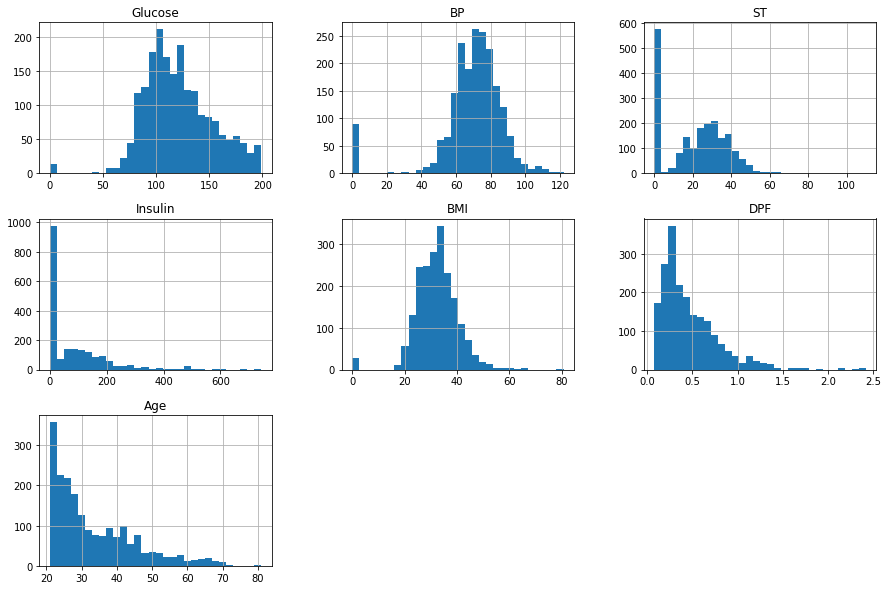

In [21]:
data.iloc[:,1:-1].hist(bins=30, figsize=(15, 10))

In [23]:
data.iloc[:,1:-3].isin([0]).sum()

Glucose     13
BP          90
ST         573
Insulin    956
BMI         28
dtype: int64

In [25]:
##replace zero values with median(can take any other option)

In [26]:
for col in ['Glucose','BP','ST','Insulin','BMI']:
    data[col] = data[col].replace({0:data[col].median()})

In [28]:
data.iloc[:,1:-3].isin([0]).sum()

Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
dtype: int64

In [29]:
data.head()

,Preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,40.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.0,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


# Feature selection using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
x = data.iloc[:,:-1].values
y = data.Outcome.values

In [34]:
rf = RandomForestClassifier(n_estimators=20,random_state=11)

In [35]:
rf.fit(x,y)

f = rf.feature_importances_
f

array([0.078091  , 0.26067978, 0.08772669, 0.06554623, 0.07987   ,
       0.16215554, 0.1193808 , 0.14654995])

In [37]:
for c,k in zip(data.columns[:-1],f):
    print(c,':',k)

Preg : 0.07809100187120024
Glucose : 0.26067978424979477
BP : 0.08772669185719037
ST : 0.06554623214789669
Insulin : 0.07986999679970912
BMI : 0.1621555448368191
DPF : 0.119380796867593
Age : 0.1465499513697967


In [42]:
#select 4 or 5 features on the basis of score
df_new = data[['Glucose','Age','DPF','Insulin']]

In [43]:
df_new.shape

(2000, 4)

In [44]:
#correlation
#PCA

In [45]:
#/hyper parameter tuning

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import test_train_split

ImportError: cannot import name 'test_train_split' from 'sklearn.model_selection' (c:\users\91810\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\__init__.py)

In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(df_new.values,df_new.Outcomes.values,test_size=.2,random_state=12)

NameError: name 'train_test_split' is not defined

NameError: name 'SVC' is not defined